# Data Modeling

**I've experimented with numerous models, and the 'Random Forest' as well as the 'XGBoost' achieved the highest evaluation metrics. However, I'll leave my other attempts here as well :)**

# Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83      7265
           1       0.92      0.67      0.77      7265

    accuracy                           0.80     14530
   macro avg       0.83      0.80      0.80     14530
weighted avg       0.83      0.80      0.80     14530

Confusion Matrix:
 [[6822  443]
 [2397 4868]]
ROC-AUC Score: 0.8775119753657737


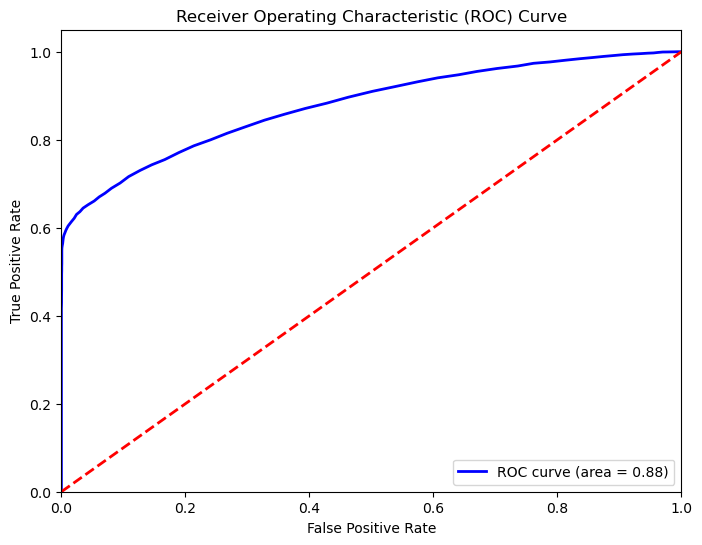

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


data = pd.read_csv(r'D:\Telecom Customer Churn\cleaned_train_data.csv')


X = data.drop('Churn', axis=1)
y = data['Churn']

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)


y_pred = rf.predict(X_val)
y_pred_proba = rf.predict_proba(X_val)[:, 1]

# Printing classification report and confusion matrix
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Calculating ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Plotting ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**The model achieved an accuracy of 80%, with a strong precision of 92% for class 1 and a high recall of 94% for class 0. The ROC-AUC score of 0.88 highlights its excellent performance in distinguishing between the two classes.**

**Handling class imbalance with SMOTE.**

#


**We'll try it now on the test data from Kaggle 'cell2cellhandout'.**

In [50]:
X_test = pd.read_csv(r'D:\Telecom Customer Churn\test_data.csv')


# Predict on test set using the trained model
y_test_pred = rf.predict(X_test)
y_test_pred_proba = rf.predict_proba(X_test)[:, 1]

# Save predictions to a new CSV file
test_df['Churn_Predicted'] = y_test_pred
test_df['Churn_Probability'] = y_test_pred_proba
test_df.to_csv(r'D:\Telecom Customer Churn\test_data_with_predictions.csv', index=False)

print("Predictions have been saved to 'test_data_with_predictions.csv'")

Predictions have been saved to 'test_data_with_predictions.csv'


**Predictions are saved in a csv file 'test_data_with_predictions'.**

#




# XGBoost

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82      7265
           1       0.89      0.68      0.77      7265

    accuracy                           0.80     14530
   macro avg       0.82      0.80      0.80     14530
weighted avg       0.82      0.80      0.80     14530

Confusion Matrix:
 [[6687  578]
 [2343 4922]]
ROC-AUC Score: 0.8614114850779815


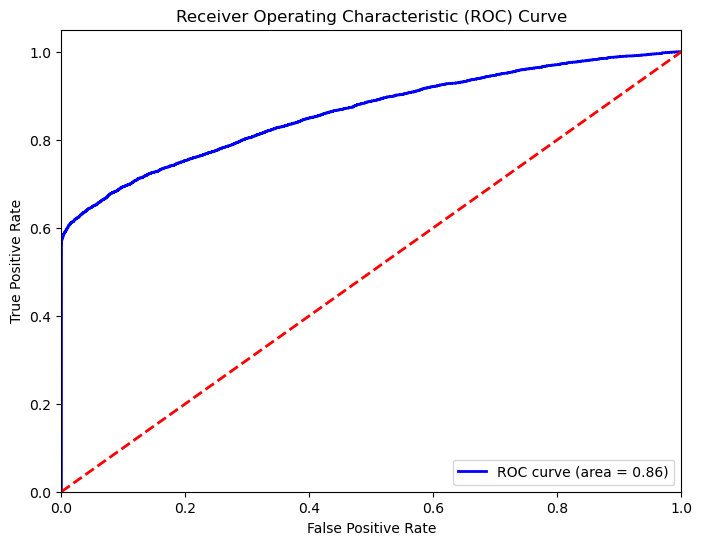

In [51]:
import xgboost as xgb

data = pd.read_csv(r'D:\Telecom Customer Churn\cleaned_train_data.csv')


X = data.drop('Churn', axis=1)
y = data['Churn']


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train your model (XGBoost classifier in this example)
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict on validation set
y_pred = xgb_clf.predict(X_val)
y_pred_proba = xgb_clf.predict_proba(X_val)[:, 1]

# Printing classification report and confusion matrix
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Calculating ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Plotting ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**The model achieved 80% accuracy, with class 0 showing 92% recall and class 1 showing 89% precision. The ROC-AUC score of 0.86 reflects good overall performance.**

In [53]:
test_df = pd.read_csv(r'D:\Telecom Customer Churn\test_data.csv')

# Predict on test set using the trained model
y_test_pred = xgb_clf.predict(test_df)
y_test_pred_proba = xgb_clf.predict_proba(test_df)[:, 1]

# Save predictions to a new CSV file
test_df['Churn_Predicted'] = y_test_pred
test_df['Churn_Probability'] = y_test_pred_proba
#test_df.to_csv(r'D:\Telecom Customer Churn\test_data_with_predictions.csv', index=False)

print("Predictions have been saved to 'test_data_with_predictions.csv'")

Predictions have been saved to 'test_data_with_predictions.csv'


#




 **                        **  
   
   
**<center>The rest of the models are of lower performance.</center>**

# Convolutional Neural Network (CNN)

Epoch 1/20
1817/1817 [==============================] - 17s 8ms/step - loss: 0.6668 - accuracy: 0.5912 - val_loss: 0.6381 - val_accuracy: 0.6449
Epoch 2/20
1817/1817 [==============================] - 13s 7ms/step - loss: 0.6329 - accuracy: 0.6396 - val_loss: 0.5931 - val_accuracy: 0.6966
Epoch 3/20
1817/1817 [==============================] - 12s 6ms/step - loss: 0.5944 - accuracy: 0.6717 - val_loss: 0.5496 - val_accuracy: 0.7084
Epoch 4/20
1817/1817 [==============================] - 14s 7ms/step - loss: 0.5622 - accuracy: 0.6931 - val_loss: 0.5258 - val_accuracy: 0.7213
Epoch 5/20
1817/1817 [==============================] - 15s 8ms/step - loss: 0.5446 - accuracy: 0.7052 - val_loss: 0.5257 - val_accuracy: 0.7274
Epoch 6/20
1817/1817 [==============================] - 14s 8ms/step - loss: 0.5281 - accuracy: 0.7137 - val_loss: 0.5002 - val_accuracy: 0.7422
Epoch 7/20
1817/1817 [==============================] - 16s 9ms/step - loss: 0.5167 - accuracy: 0.7210 - val_loss: 0.4873 - val_ac

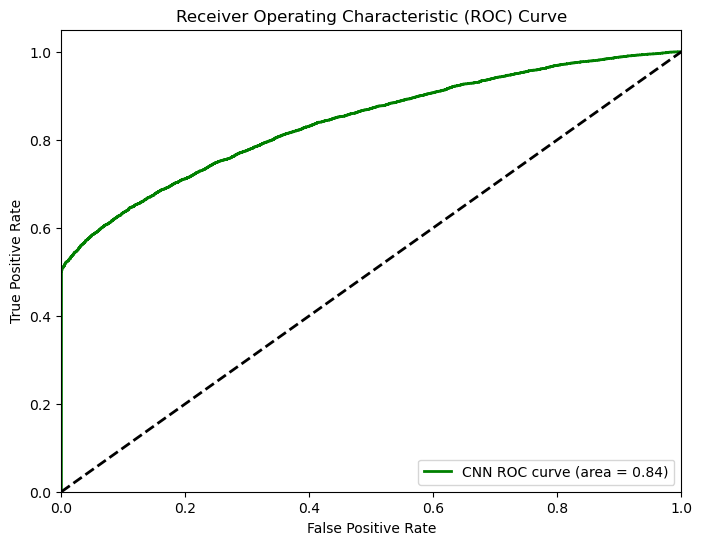

In [57]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


data = pd.read_csv(r'D:\Telecom Customer Churn\cleaned_train_data.csv')


X = data.drop('Churn', axis=1).values
y = data['Churn'].values

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Reshape data for Conv1D layer
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)


y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)


model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(32, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_data=(X_val, y_val_cat))

# Evaluate the model
y_val_pred_proba = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)

# Printing classification report and confusion matrix
print("CNN Classification Report:\n", classification_report(y_val, y_val_pred))
print("CNN Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Calculating ROC-AUC Score
roc_auc_cnn = roc_auc_score(y_val_cat, y_val_pred_proba)
print("CNN ROC-AUC Score:", roc_auc_cnn)

# Plotting ROC curve
fpr_cnn, tpr_cnn, _ = roc_curve(y_val, y_val_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, color='green', lw=2, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Accuracy of 77%**

#



# K-Nearest Neighbours (KNN)

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.51      0.63      7265
           1       0.64      0.88      0.74      7265

    accuracy                           0.70     14530
   macro avg       0.73      0.70      0.68     14530
weighted avg       0.73      0.70      0.68     14530

KNN Confusion Matrix:
 [[3704 3561]
 [ 863 6402]]
KNN ROC-AUC Score: 0.7823982182720894


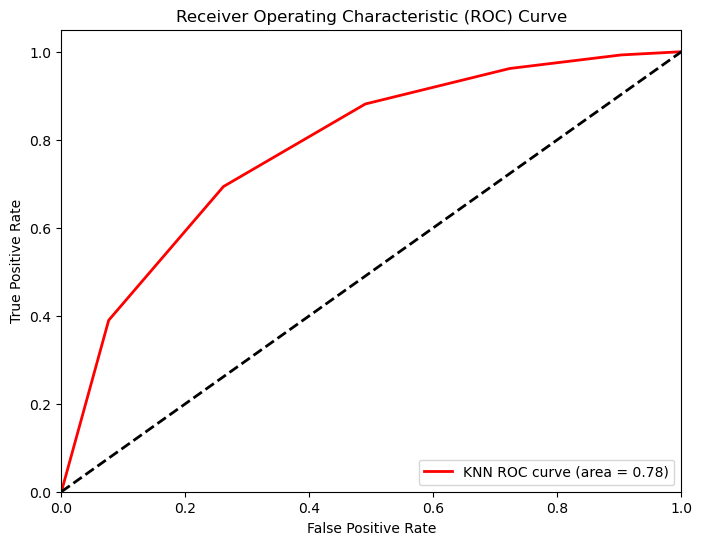

In [55]:
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv(r'D:\Telecom Customer Churn\cleaned_train_data.csv')

X = data.drop('Churn', axis=1)
y = data['Churn']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
y_pred_proba_knn = knn.predict_proba(X_val)[:, 1]

# Printing classification report and confusion matrix
print("KNN Classification Report:\n", classification_report(y_val, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))

# Calculating ROC-AUC Score
roc_auc_knn = roc_auc_score(y_val, y_pred_proba_knn)
print("KNN ROC-AUC Score:", roc_auc_knn)

# Plotting ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_val, y_pred_proba_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Despite the moderate accuracy of 70%, the model demonstrates a solid recall of 88% for class 1, indicating a strong ability to identify true positives. The ROC-AUC score of 0.78 suggests a fair overall performance in distinguishing between the two classes.**

#




# Dense Neural Network (DNN)

Epoch 1/50
1817/1817 [==============================] - 10s 5ms/step - loss: 0.6988 - accuracy: 0.5232 - val_loss: 0.6887 - val_accuracy: 0.5317
Epoch 2/50
1817/1817 [==============================] - 7s 4ms/step - loss: 0.6846 - accuracy: 0.5583 - val_loss: 0.6769 - val_accuracy: 0.5849
Epoch 3/50
1817/1817 [==============================] - 8s 5ms/step - loss: 0.6773 - accuracy: 0.5767 - val_loss: 0.6711 - val_accuracy: 0.5968
Epoch 4/50
1817/1817 [==============================] - 8s 5ms/step - loss: 0.6723 - accuracy: 0.5887 - val_loss: 0.6604 - val_accuracy: 0.6109
Epoch 5/50
1817/1817 [==============================] - 8s 5ms/step - loss: 0.6665 - accuracy: 0.5988 - val_loss: 0.6569 - val_accuracy: 0.6127
Epoch 6/50
1817/1817 [==============================] - 9s 5ms/step - loss: 0.6631 - accuracy: 0.6024 - val_loss: 0.6530 - val_accuracy: 0.6208
Epoch 7/50
1817/1817 [==============================] - 8s 4ms/step - loss: 0.6597 - accuracy: 0.6091 - val_loss: 0.6533 - val_accuracy

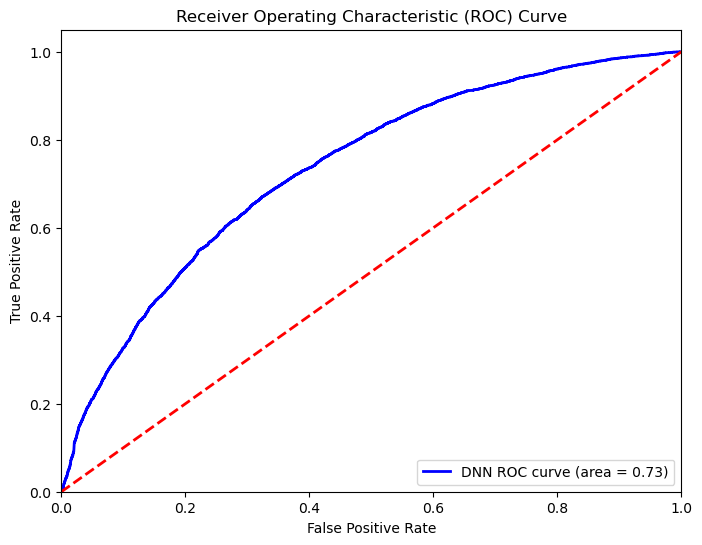

In [58]:
data = pd.read_csv(r'D:\Telecom Customer Churn\cleaned_train_data.csv')


X = data.drop('Churn', axis=1).values
y = data['Churn'].values

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_data=(X_val, y_val_cat))

# Evaluate the model
y_val_pred_proba = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)

# Printing classification report and confusion matrix
print("DNN Classification Report:\n", classification_report(y_val, y_val_pred))
print("DNN Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Calculating ROC-AUC Score
roc_auc_dnn = roc_auc_score(y_val_cat, y_val_pred_proba)
print("DNN ROC-AUC Score:", roc_auc_dnn)

# Plotting ROC curve
fpr_dnn, tpr_dnn, _ = roc_curve(y_val, y_val_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_dnn, tpr_dnn, color='blue', lw=2, label='DNN ROC curve (area = %0.2f)' % roc_auc_dnn)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Accuracy of 67%**

#




# Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61      7265
           1       0.62      0.64      0.63      7265

    accuracy                           0.62     14530
   macro avg       0.62      0.62      0.62     14530
weighted avg       0.62      0.62      0.62     14530

Confusion Matrix:
 [[4376 2889]
 [2607 4658]]
ROC-AUC Score: 0.6642492903355377


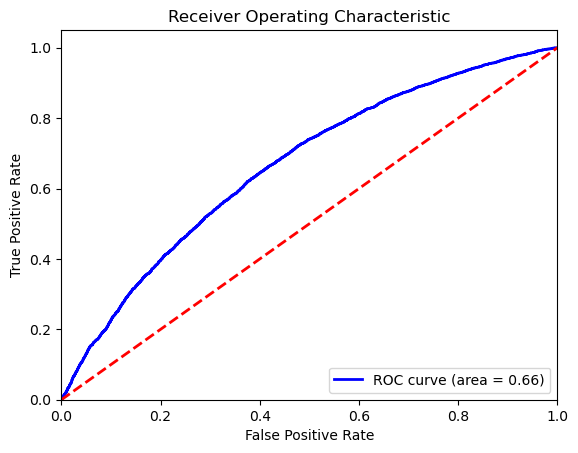

In [60]:
from sklearn.linear_model import LogisticRegression

data = pd.read_csv(r'D:\Telecom Customer Churn\cleaned_train_data.csv')


X = data.drop('Churn', axis=1)
y = data['Churn']


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)


logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC Score
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#




#  Naïve Bayes

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.48      0.54      7265
           1       0.58      0.72      0.64      7265

    accuracy                           0.60     14530
   macro avg       0.60      0.60      0.59     14530
weighted avg       0.60      0.60      0.59     14530

Confusion Matrix:
 [[3473 3792]
 [2057 5208]]
ROC-AUC Score: 0.6405364509150917


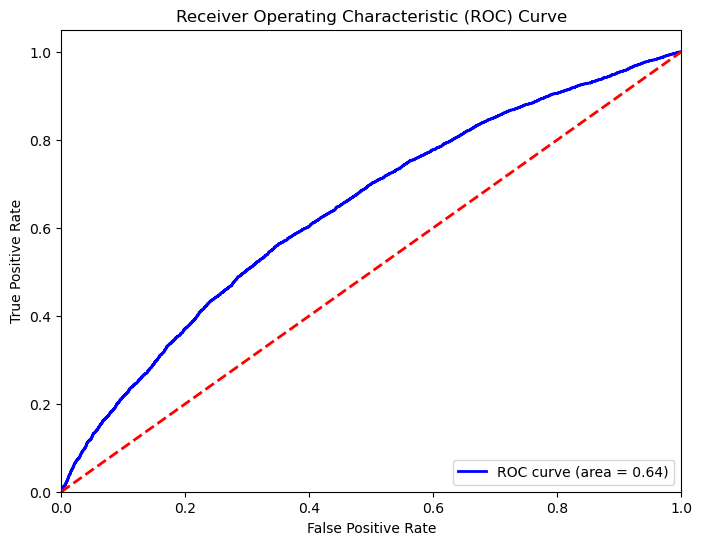

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the cleaned training data
data = pd.read_csv(r'D:\Telecom Customer Churn\cleaned_train_data.csv')

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on validation set
y_val_pred = nb.predict(X_val)
y_val_pred_proba = nb.predict_proba(X_val)[:, 1]

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Plotting ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**This is by far the worst!**